# 4章ニューラルネットワークの学習

ニューラルネットワークの特徴は、データから学習できる点にあります。データから学習するとは、重みパラメータの値をデータから自動で決定できるということです。

損失関数は、任意の関数を用いることができますが、一般には、2 乗和誤差や交差エントロピー誤差などが用いられます。

In [1]:
import numpy as np

In [2]:
# 2乗和誤差
def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 「2」を正解とする
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(sum_squared_error(np.array(y), np.array(t)))

y_2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squared_error(np.array(y_2), np.array(t)))

0.09750000000000003
0.5975


ここでは、2 つの例を示しています。ひとつ目の例は、正解を「2」として、ニュー ラルネットワークの出力が「2」で最も高い場合です。一方、2 つ目の例では、正解は 「2」ですが、ニューラルネットワークの出力は「7」で最も高くなっています。この
実験の結果で示されるように、ひとつ目の例の損失関数のほうが小さくなっており、 教師データとの誤差が小さいことが分かります。つまり、ひとつ目の例のほうが、出 力結果が教師データにより適合していることを 2 乗和誤差は示しているのです。

In [4]:
# 交差エントロピー誤差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

中身の実装では、np.log の 計算時に、微小な値である delta を足して計算しています。これは、np.log(0) の ような計算が発生した場合、np.log(0) はマイナスの無限大を表す-inf となり、そ うなってしまうと、それ以上計算を進めることができなくなります。その防止策とし て、微小な値を追加して、マイナス無限大を発生させないようにしています。

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

y_2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(cross_entropy_error(np.array(y_2), np.array(t)))

0.510825457099338
2.302584092994546


## 4.3 数値微分 

In [6]:
# 数値微分(数値勾配)の実装
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

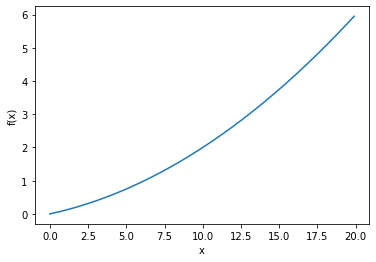

In [7]:
def function_1(x):
    return 0.01*x**2 + 0.1*x


import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [8]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


## 4.3.3 偏微分

In [9]:
def function_2(x):
    return np.sum(x**2)

問 1:x0 = 3、x1 = 4 のときの x0 に対する偏微分 ∂f/∂x0<br>
```
>>> def function_tmp1(x0):
... return x0*x0 + 4.0**2.0
...
>>> numerical_diff(function_tmp1, 3.0) 
6.00000000000378
```
問 2:x0 = 3、x1 = 4 のときの x1 に対する偏微分 ∂f ∂x1<br>
```
>>> def function_tmp2(x1):
... return 3.0**2.0 + x1*x1
...
>>> numerical_diff(function_tmp2, 4.0) 
7.999999999999119
```

## 4.4 勾配

In [10]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [11]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## 4.4.1 勾配法
機械学習の問題の多くは、学習の際に最適なパラメータを探索します。ニューラル
ネットワークも同様に最適なパラメータ(重みとバイアス)を学習時に見つけなけれ
ばなりません。ここで、最適なパラメータというのは、損失関数が最小値を取るとき
のパラメータの値です。しかし、一般的に損失関数は複雑です。パラメータ空間は広
大であり、どこに最小値を取る場所があるのか見当がつきません。そこで、勾配をう
まく利用して関数の最小値(または、できるだけ小さな値)を探そう、というのが勾
配法です。<br>
勾配法では、現在の場所から勾配方向に一定の距離だけ 進みます。そして、移動した先でも同様に勾配を求め、また、その勾配方向へ進むと いうように、繰り返し勾配方向へ移動します。このように勾配方向へ進むことを繰り 返すことで、関数の値を徐々に減らすのが勾配法(gradient method)です。勾配法 は機械学習の最適化問題でよく使われる手法です。特に、ニューラルネットワークの 学習では勾配法がよく用いられます。

In [12]:
# 勾配降下法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [13]:
# 問:f (x0 , x1 ) = x20 + x21 の最小値を勾配法で求めよ。
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [14]:
# 学習率が大きすぎる例:lr=10.0
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([ 2.34235971e+12, -3.96091057e+12])

In [15]:
# 学習率が小さすぎる例:lr=1e-10
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([ 2.34235971e+12, -3.96091057e+12])

In [16]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from function import cross_entropy_error ,softmax

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布で初期化

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [17]:
net = simpleNet()
print(net.W)

[[-0.1522756  -1.30502276 -0.60331916]
 [ 1.50201973 -0.45185739 -1.4371024 ]]


In [18]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.2604524  -1.18968531 -1.65538365]


In [19]:
t = np.array([0, 0, 1])
net.loss(x, t)

3.047248480944987

In [20]:
from function import numerical_gradient

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.52611142  0.04539379 -0.57150521]
 [ 0.78916713  0.06809069 -0.85725781]]


## 4.5 学習アルゴリズムの実装

### 前提
  ニューラルネットワークは、適応可能な重みとバイアスがあり、この重みとバ イアスを訓練データに適応するように調整することを「学習」と呼ぶ。ニュー ラルネットワークの学習は次の 4 つの手順で行う。

### ステップ 1(ミニバッチ)
   訓練データの中からランダムに一部のデータを選び出す。その選ばれたデータ
   をミニバッチと言い、ここでは、そのミニバッチの損失関数の値を減らすこと
   を目的とする。

### ステップ 2(勾配の算出)
   ミニバッチの損失関数を減らすために、各重みパラメータの勾配を求める。勾
   配は、損失関数の値を最も減らす方向を示す。

### テップ 3(パラメータの更新)
   重みパラメータを勾配方向に微小量だけ更新する。

### ステップ 4(繰り返す)
   ステップ 1、ステップ 2、ステップ 3 を繰り返す。

## 4.5.1 2 層ニューラルネットワークのクラス

In [21]:
import sys, os
sys.path.append(os.pardir)
from function import *

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, f):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [22]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


params:ニューラルネットワークのパラメータを保持するディクショナリ変数(インスタンス変数)<br>
grads:勾配を保持するディクショナリ変数(numerical_gradient() メソッド の返り値)。

In [23]:
# ダミーの入力データ(100 枚分)
x = np.random.rand(100, 784)
y = net.predict(x)

In [24]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


numerical_gradient(self, x, t) は、数値微分によってパラメータ の勾配を計算します。次章では、この勾配の計算を高速に求める手法につい て説明します。<br>
次章では、この勾配の計算を高速に求める手法につい て説明します。その手法は誤差逆伝播法と言います。誤差逆伝播法を使って求 めた勾配の結果は、数値微分による結果とほぼ同じになりますが、高速に処 理することができます。なお、誤差逆伝播法によって勾配を求めるメソッド は、gradient(self, x, t) という名前で、次章で実装する予定ですが、 ニューラルネットワークの学習には時間がかかりますので、時間を節約した い人は、先取りして、numerical_gradient(self, x, t) の代わりに、 gradient(self, x, t) を使いましょう!

## 4.5.2 ミニバッチ学習の実装

In [25]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_train, t_train) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)


## 4.5.3 テストデータで評価

In [ ]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

# ハイパーパラメータ
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

上の例では、1 エポックごとに、すべての訓練データとテストデータに対して認識 精度を計算して、その結果を記録します。なぜ 1 エポックごとに認識精度を計算する かというと、for 文の繰り返しの中で常に認識精度を計算していては、時間がかかっ てしまうからです。そして、そこまで細かい頻度で認識精度を記録する必要もないか らです(より大きな視点でざっくりと認識精度の推移が分かればよいのです)。その ため、訓練データの 1 エポックごとに認識精度の経過を記録します。

● 機械学習で使用するデータセットは、訓練データとテストデータに分けて 使用する。<br>
● 訓練データで学習を行い、学習したモデルの汎化能力をテストデータで評 価する。<br>
● ニューラルネットワークの学習は、損失関数を指標として、損失関数の値 が小さくなるように、重みパラメータを更新する。<br>
● 重みパラメータを更新する際には、重みパラメータの勾配を利用して、勾 配方向に重みの値を更新する作業を繰り返す。<br>
● 微小な値を与えたときの差分によって微分を求めることを数値微分と 言う。<br>
● 数値微分によって、重みパラメータの勾配を求めることができる。<br>
● 数値微分による計算には時間がかかるが、その実装は簡単である。一方、次章で実装するやや複雑な誤差逆伝播法は、高速に勾配を求めることができる。